In [1]:
import os
import re
import ants
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
np.random.seed(seed=42) 

## After WM Segmentations

In [2]:
save_dir = "/DATA/Users/amahmood/braintyp/segs/"
hcpd_seg_paths = glob.glob(f"{save_dir}/HCD*.npz")
hcpd_seg_paths[:3]

['/DATA/Users/amahmood/braintyp/segs/HCD1855365.npz',
 '/DATA/Users/amahmood/braintyp/segs/HCD1856468.npz',
 '/DATA/Users/amahmood/braintyp/segs/HCD1857066.npz']

In [3]:
subids = [re.search(r"(HCD.*).npz", p).group(1) for p in hcpd_seg_paths]
subids[:3]

['HCD1855365', 'HCD1856468', 'HCD1857066']

In [4]:
%%time
t1_wm = []
t2_wm = []

for p in hcpd_seg_paths:
    with np.load(p) as f:
        t1_wm.append(f['t1'])
        t2_wm.append(f['t2'])

CPU times: user 14.9 s, sys: 1.41 s, total: 16.3 s
Wall time: 17 s


In [5]:
t1_wm_means = pd.Series(np.array([x.mean() for x in t1_wm]), index=subids)
t2_wm_means = pd.Series(np.array([x.mean() for x in t2_wm]), index=subids)

In [6]:
t1_wm_stds = pd.Series(np.array([x.std() for x in t1_wm]), index=subids)
t2_wm_stds = pd.Series(np.array([x.std() for x in t2_wm]), index=subids)

count    652.000000
mean       0.768795
std        0.038878
min        0.705327
25%        0.738519
50%        0.759896
75%        0.795083
max        0.895507
dtype: float64

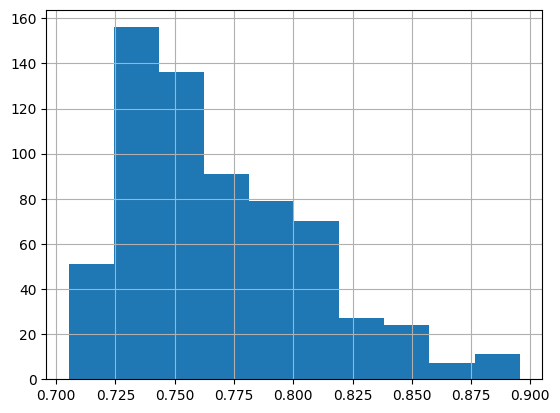

In [7]:
t1_wm_means.hist()
t1_wm_means.describe()

In [8]:
t1_mu = t1_wm_means.dropna().mean()
t1_std = t1_wm_means.dropna().std()

print(f"Mean: {t1_mu:.3f} w/ std {t1_std:.3f}")

Mean: 0.769 w/ std 0.039


### T1 Standard Deviation distribution

count    652.000000
mean       0.025897
std        0.007915
min        0.012856
25%        0.019373
50%        0.023792
75%        0.031856
max        0.047721
dtype: float64

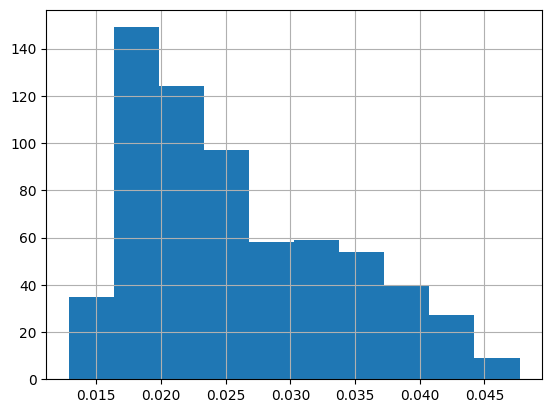

In [9]:
t1_wm_stds.hist()
t1_wm_stds.describe()

In [10]:
t1_stds_mu = t1_wm_stds.mean()
t1_stds_std = t1_wm_stds.std()

print(f"Mean: {t1_stds_mu:.3f} w/ std {t1_stds_std:.3f}")

Mean: 0.026 w/ std 0.008


In [11]:
mult = 3
t1_mu_candidates = (t1_wm_means > (t1_mu + mult*t1_std)) | (t1_wm_means < (t1_mu - mult*t1_std))
t1_std_candidates = (t1_wm_stds > (t1_stds_mu + mult*t1_stds_std)) | (t1_wm_stds < (t1_stds_mu - mult*t1_stds_std))
t1_candidates = t1_mu_candidates | t1_std_candidates
t1_outliers = np.argwhere(t1_candidates.to_numpy()).flatten()
len(t1_outliers)

5

In [12]:
t1_wm_stds[t1_outliers]

HCD2134031    0.031846
HCD2310328    0.033172
HCD0225529    0.030280
HCD1502635    0.028005
HCD1842558    0.032910
dtype: float32

HCD2134031: /UTexas/HCP/HCPD/fmriresults01/HCD2134031_V1_MR/T1w/T1w_acpc_dc.nii.gz


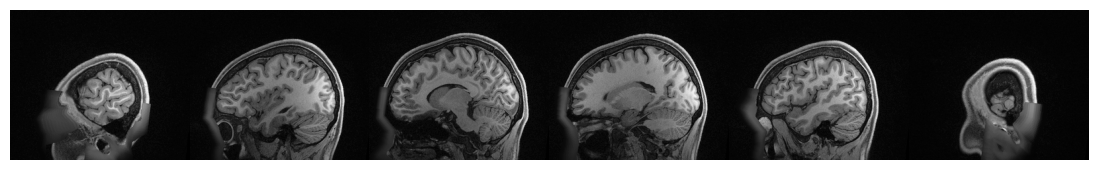

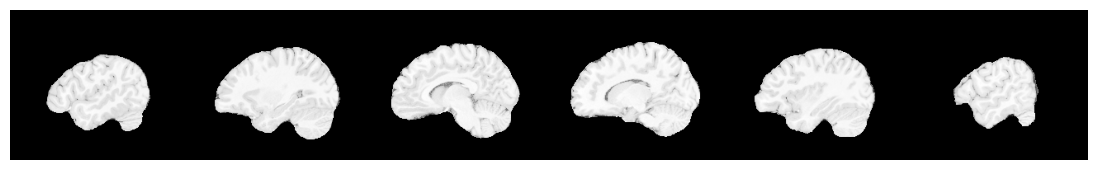

HCD2310328: /UTexas/HCP/HCPD/fmriresults01/HCD2310328_V1_MR/T1w/T1w_acpc_dc.nii.gz


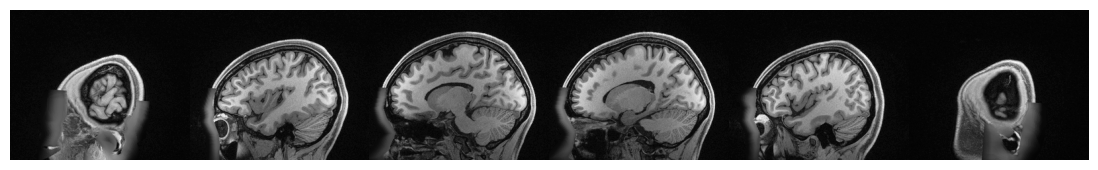

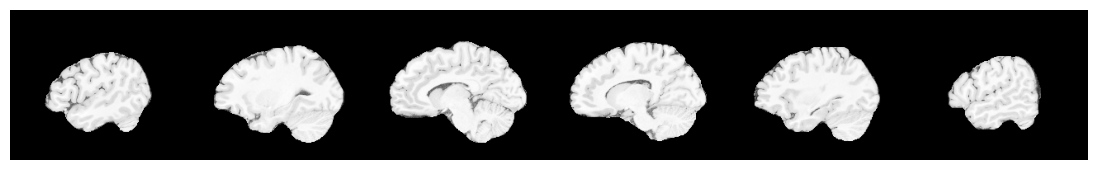

HCD0225529: /UTexas/HCP/HCPD/fmriresults01/HCD0225529_V1_MR/T1w/T1w_acpc_dc.nii.gz


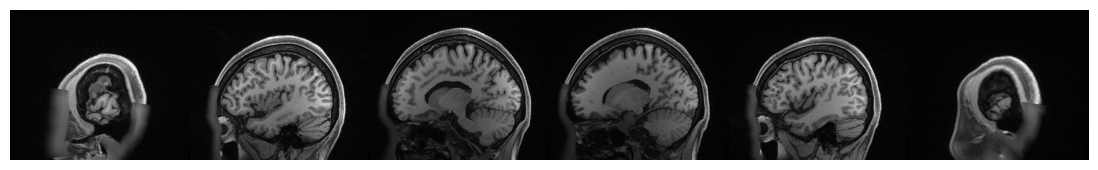

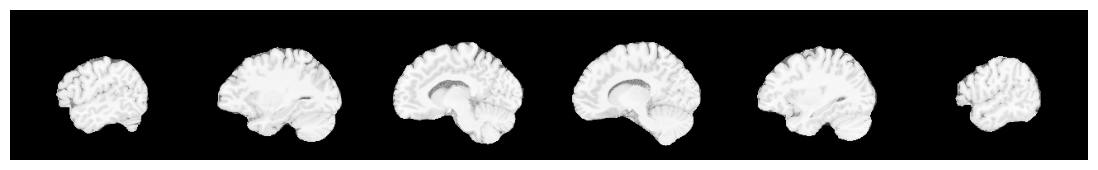

In [13]:
for tidx in t1_outliers[:3]:
    sid = t1_wm_means.index[tidx]
    path = f"/UTexas/HCP/HCPD/fmriresults01/{sid}_V1_MR/T1w/T1w_acpc_dc.nii.gz"
    print(f"{sid}: {path}")
    preproc_path = f"/DATA/Users/amahmood/braintyp/processed_v2/{sid}.nii.gz"
#     print(f"{sid}: {path}")

    t1_outlier_img = ants.image_read(path)
    t1_outlier_img.plot(nslices=6)
    
    t1_outlier_img_procd,_ = ants.image_read(preproc_path).split_channels()
    t1_outlier_img_procd.plot(nslices=6)

In [14]:
# sid = t1_wm_means.index[13]

# fs_seg_path = f"/UTexas/HCP/HCPD/fmriresults01/{sid}_V1_MR/MNINonLinear/aparc+aseg.nii.gz"
# path = f"/UTexas/HCP/HCPD/fmriresults01/{sid}_V1_MR/T1w/T1w_acpc_dc.nii.gz"
# print(f"{sid}: {fs_seg_path}")
# t1_img = ants.image_read(path)
# seg_img = ants.image_read(fs_seg_path)
# t1_img.plot(overlay=seg_img)

# fs_mask_path = f"/UTexas/HCP/HCPD/fmriresults01/{sid}_V1_MR/MNINonLinear/brainmask_fs.nii.gz"
# print(f"{sid}: {fs_seg_path}")
# mask_img = ants.image_read(fs_mask_path)
# t1_img.plot(overlay=mask_img)

### T2

count    652.000000
mean       0.556836
std        0.029075
min        0.488401
25%        0.541053
50%        0.555275
75%        0.567584
max        0.817620
dtype: float64

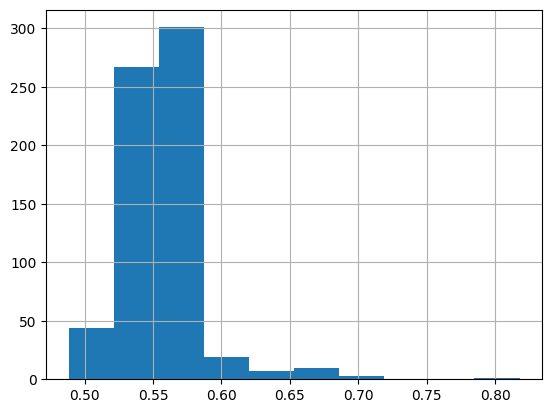

In [15]:
t2_wm_means.hist()
t2_wm_means.describe()

count    652.000000
mean       0.046224
std        0.010556
min        0.022172
25%        0.039964
50%        0.045978
75%        0.052017
max        0.159998
dtype: float64

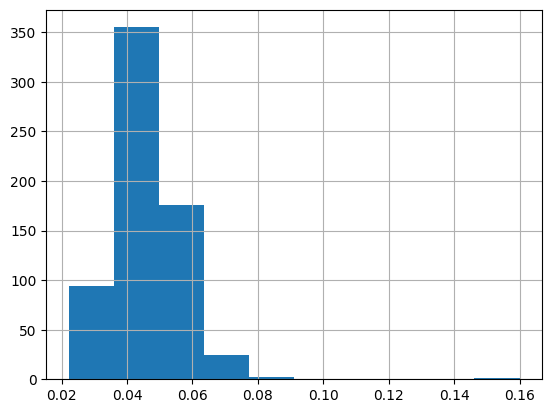

In [16]:
t2_wm_stds.hist()
t2_wm_stds.describe()

In [17]:
t2_mu = t2_wm_means.dropna().mean()
t2_std = t2_wm_means.dropna().std()

In [18]:
print(f"Mean: {t2_mu:.3f} w/ std {t2_std:.3f}")

Mean: 0.557 w/ std 0.029


In [19]:
t2_stds_mu = t2_wm_stds.mean()
t2_stds_std = t2_wm_stds.std()

print(f"Mean: {t2_stds_mu:.3f} w/ std {t2_stds_std:.3f}")

Mean: 0.046 w/ std 0.011


In [20]:
mult = 3
t2_mu_candidates = (t2_wm_means > (t2_mu + mult*t2_std)) | (t2_wm_means < (t2_mu - mult*t2_std))
t2_std_candidates = (t2_wm_stds > (t2_stds_mu + mult*t2_stds_std)) | (t2_wm_stds < (t2_stds_mu - mult*t2_stds_std))
t2_candidates = t2_mu_candidates | t2_std_candidates
t2_outliers = np.argwhere(t2_candidates.to_numpy()).flatten()
len(t2_outliers)

16

In [21]:
sorted_t2 = t2_wm_means[t2_outliers].sort_values(ascending=False)
sorted_t2[:2]

HCD1685164    0.817620
HCD0679770    0.705964
dtype: float32

HCD1685164: /UTexas/HCP/HCPD/fmriresults01/HCD1685164_V1_MR/T1w/T2w_acpc_dc.nii.gz


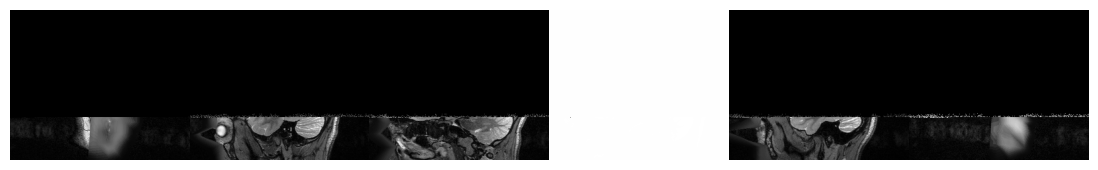

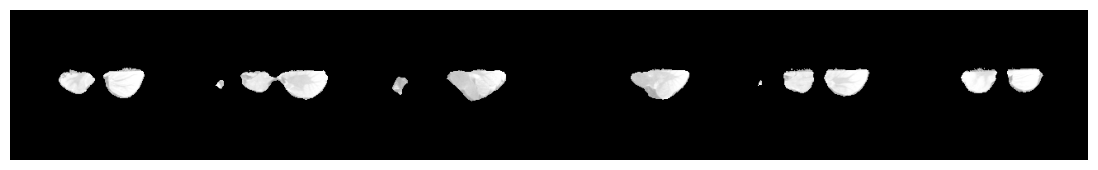

HCD0679770: /UTexas/HCP/HCPD/fmriresults01/HCD0679770_V1_MR/T1w/T2w_acpc_dc.nii.gz


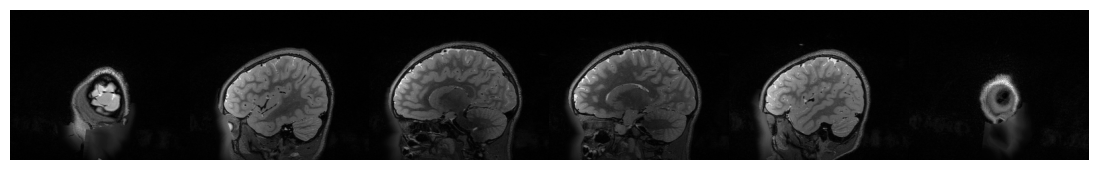

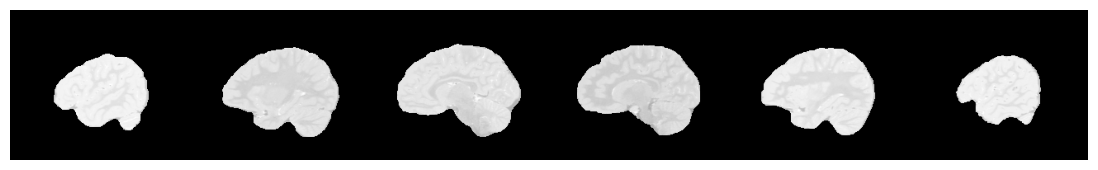

HCD0977576: /UTexas/HCP/HCPD/fmriresults01/HCD0977576_V1_MR/T1w/T2w_acpc_dc.nii.gz


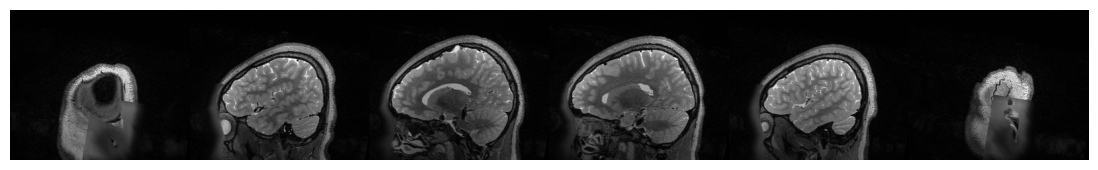

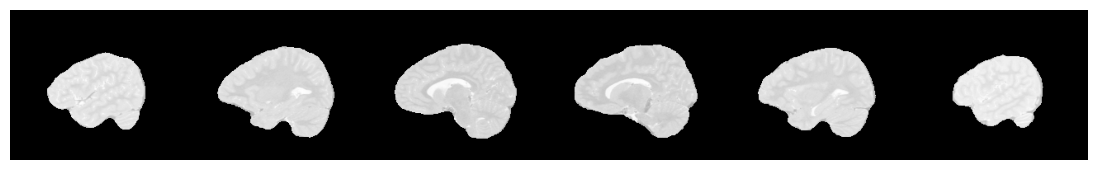

In [22]:
for sid in sorted_t2.index[:3]:
    path = f"/UTexas/HCP/HCPD/fmriresults01/{sid}_V1_MR/T1w/T2w_acpc_dc.nii.gz"
    print(f"{sid}: {path}")
    preproc_path = f"/DATA/Users/amahmood/braintyp/processed_v2/{sid}.nii.gz"
#     print(f"{sid}: {path}")

    t2_outlier_img = ants.image_read(path)
    t2_outlier_img.plot(nslices=6)
    
    _, t2_outlier_img_procd = ants.image_read(preproc_path).split_channels()
    t2_outlier_img_procd.plot(nslices=6)

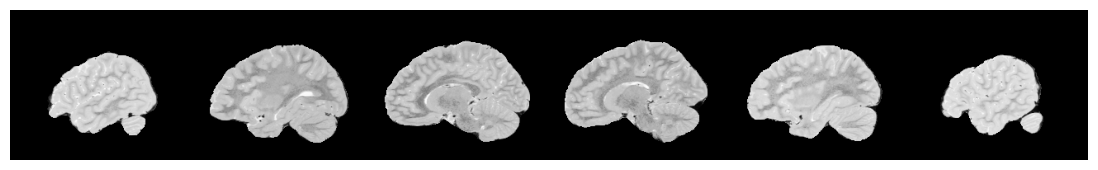

In [23]:
t2_median_idx = t2_wm_means.sort_values(ascending=False).index[len(t2_wm_means)//2]
median_path = f"/DATA/Users/amahmood/braintyp/processed_v2/{t2_median_idx}.nii.gz"
t2med_t1_img, t2_median_img = ants.image_read(median_path).split_channels()
t2_median_img.plot(nslices=6)

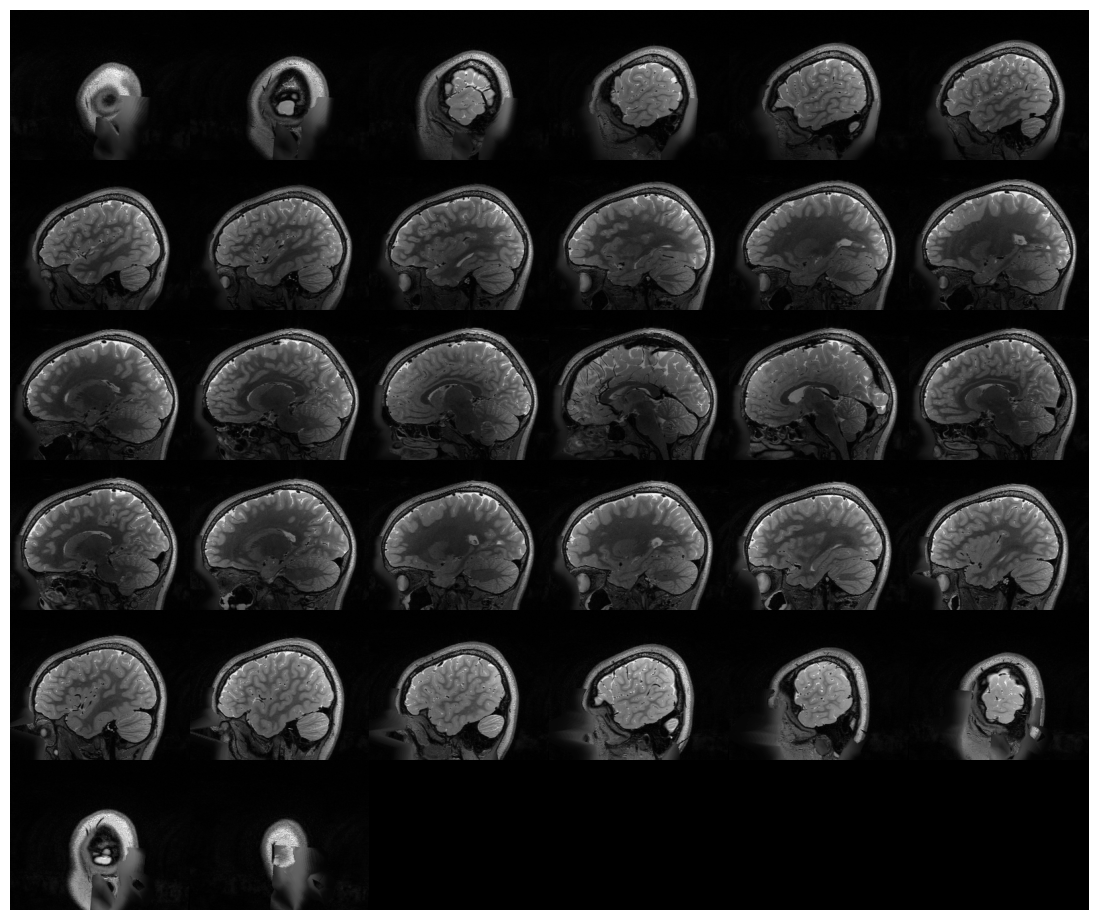

In [24]:
path = f"/UTexas/HCP/HCPD/fmriresults01/{t2_median_idx}_V1_MR/T1w/T2w_acpc_dc.nii.gz"
t2_img = ants.image_read(path)
t2_img.plot(nslices=32)

In [25]:
# for sid in t2_wm_means[t2_outliers].sort_values(ascending=False).index:
#     print(sid)
# #     path = f"/DATA/ImageData/Data/sub-{sid}/ses-baselineYear1Arm1/anat/sub-{sid}_ses-baselineYear1Arm1_run-01_T2w.nii.gz"
# #     t2_outlier_img = ants.image_read(path)
#     path = f"/DATA/Users/amahmood/braintyp/processed_v2/{sid}.nii.gz"
#     t2out_t1_img, t2_outlier_img = ants.image_read(path).split_channels()
# #     t2_outlier_img.plot()
#     t2_viz_path =  f"/DATA/Users/amahmood/braintyp/t2_outliers/t2_{sid}.nii.gz"
#     t2_outlier_img.to_filename(t2_viz_path)

In [26]:
# os.makedirs(f"/DATA/Users/amahmood/braintyp/t2_inliers", exist_ok=True)

# for i, sid in enumerate(t2_wm_means.drop(index=t2_wm_means[t2_outliers].index).index):
#     print(sid)
#     path = f"/DATA/Users/amahmood/braintyp/processed_v2/{sid}.nii.gz"
#     t2out_t1_img, t2_outlier_img = ants.image_read(path).split_channels()
#     t2_viz_path =  f"/DATA/Users/amahmood/braintyp/t2_inliers/HPCD_{sid}.nii.gz"
#     t2_outlier_img.to_filename(t2_viz_path)
    
#     if i > 5:
#         break

# for sid in t2_wm_means[t2_outliers].index:
#     print(sid)
#     path = f"/DATA/Users/amahmood/braintyp/processed_v2/{sid}.nii.gz"
#     t2out_t1_img, t2_outlier_img = ants.image_read(path).split_channels()
#     t2_viz_path =  f"/DATA/Users/amahmood/braintyp/t2_outliers/t2_{sid}.nii.gz"
#     t2_outlier_img.to_filename(t2_viz_path)

# Final set of cleaned keys!

In [27]:
t2_wm_means[t2_outliers].index

Index(['HCD0861052', 'HCD1445245', 'HCD0906250', 'HCD0232223', 'HCD2344244',
       'HCD0121719', 'HCD1685164', 'HCD0977576', 'HCD2926973', 'HCD0679770',
       'HCD1928871', 'HCD0147333', 'HCD2841965', 'HCD0789272', 'HCD2785678',
       'HCD0671956'],
      dtype='object')

In [28]:
handpicked_outliers = set(["HCD1685164","HCD0861052","HCD1445245", "HCD0232223", "HCD0906250", "HCD0679770", "HCD2344244" ])
# handpicked_outliers = set(t2_wm_means[t2_outliers].index)

wm_outlier_keys = set(t1_wm_means[t1_outliers].index)
wm_outlier_keys = wm_outlier_keys.union(handpicked_outliers)

In [29]:
len(t1_wm_means), len(wm_outlier_keys)

(652, 12)

In [30]:
hcpd_wm_qc_passing_keys = pd.Series(t1_wm_means[~t1_wm_means.index.isin(wm_outlier_keys)].index)
hcpd_wm_qc_passing_keys.shape

(640,)

In [31]:
hcpd_wm_qc_passing_keys

0      HCD1855365
1      HCD1856468
2      HCD1857066
3      HCD1964269
4      HCD1983879
          ...    
635    HCD2336346
636    HCD1778474
637    HCD2982276
638    HCD0577358
639    HCD1581455
Length: 640, dtype: object

In [32]:
hcpd_wm_qc_passing_keys.to_csv("hcpd_wm_qc_passing_keys.txt", header=None, index=None)